In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [77]:
df = pd.read_csv('./DSA_features.csv')

In [78]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [79]:
df.shape

(9120, 272)

In [80]:
df.info

<bound method DataFrame.info of       T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
0        7.975714      8.1605      7.6823    0.014395    0.119981   
1        7.978250      8.1763      7.8472    0.007551    0.086896   
2        7.970894      8.0860      7.8470    0.003092    0.055603   
3        7.938412      8.1083      7.6901    0.003763    0.061343   
4        7.908930      8.1305      7.8322    0.001741    0.041731   
...           ...         ...         ...         ...         ...   
9115     8.280854     34.1980     -2.9038   28.080803    5.299132   
9116     9.591118     51.6970     -3.4129   35.722025    5.976791   
9117     9.599113     27.9300     -1.0765   48.850886    6.989341   
9118     9.692482     72.7820     -2.6734   59.378336    7.705734   
9119     9.380641     45.0090     -3.5938   40.459334    6.360765   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
0       -0.023319     1.083150      1.1832     0.99744    0.0022

In [81]:
df.isnull().values.any()

False

In [82]:
LABELS = ["Normal", "Abnormal"]

In [83]:
df['activity'].unique()

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_56021/2417958649.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


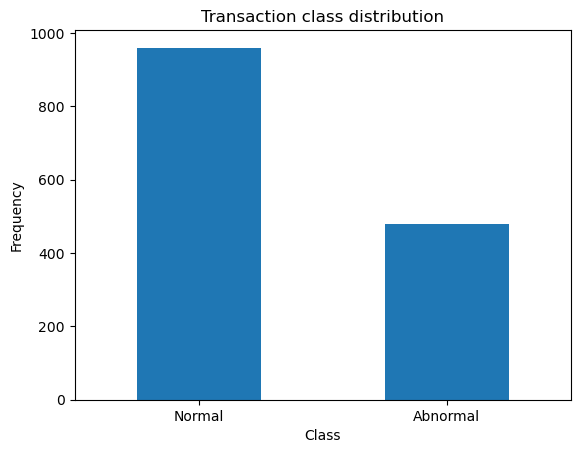

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# 'lyingBack'과 'lyingRigh'는 Normal(0)로, 'jumping'은 Abnormal(1)로 설정
df['Class'] = df['activity'].apply(lambda x: 0 if x in ['lyingBack', 'lyingRigh'] else (1 if x == 'stepper' else None))

# 결측값 제거 (필요에 따라 적용)
df = df.dropna(subset=['Class'])

# Class별 샘플 수 세기
count_classes = pd.value_counts(df['Class'], sort=True)

# 막대 그래프 그리기
LABELS = ['Normal', 'Abnormal']
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [85]:
df['Class'].value_counts()

Class
0.0    960
1.0    480
Name: count, dtype: int64

In [86]:
Abnormal = df[df.Class == 1]
normal = df[df.Class == 0]
Abnormal.shape

(480, 273)

In [87]:
normal.shape

(960, 273)

In [88]:
print(Abnormal.columns)
print(normal.columns)


Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'Class'],
      dtype='object', length=273)
Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'Class'],
      dtype='object', length=273)


In [89]:
X_train = normal

In [90]:
X_test = pd.concat([Abnormal, normal])
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
5760,9.725234,23.1430,4.7404,15.810555,3.976249,1.663395,-0.500336,2.2943,-4.2173,0.996787,...,0.157709,0.320379,0.59707,-0.029724,0.036117,0.190046,-0.248472,stepper,p1,1.0
5761,9.338502,21.5560,3.2083,13.511136,3.675750,1.501780,-0.417666,2.3492,-5.0213,1.113368,...,0.068890,0.305362,0.58717,-0.041444,0.033846,0.183973,-0.078934,stepper,p1,1.0
5762,9.758073,23.0280,4.5964,15.131609,3.889937,1.496554,-0.339354,2.6967,-3.4259,1.195119,...,-0.025852,0.271109,0.54881,-0.013597,0.031880,0.178551,0.046234,stepper,p1,1.0
5763,9.625570,22.3870,4.3394,15.898343,3.987273,1.620416,-0.310809,2.0502,-4.3835,1.190077,...,0.403472,0.299858,0.54294,-0.018200,0.031962,0.178781,-0.222449,stepper,p1,1.0
5764,9.479315,22.5660,4.6795,12.511807,3.537203,1.575279,-0.365894,1.6065,-4.5499,0.972988,...,0.209921,0.289785,0.55596,-0.024470,0.035503,0.188423,-0.064461,stepper,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.401254,-0.410987,-0.38221,-0.446050,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.147180,-0.411248,-0.36581,-0.436760,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.032341,-0.409787,-0.37926,-0.434310,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.409508,-0.409101,-0.36074,-0.440870,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [91]:
X_train = normal.drop(['Class', 'activity', 'people'], axis=1)

In [92]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,0.56276,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,0.56394,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.56445,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,0.56420,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,0.56455,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.34240,-9.42070,0.000242,...,-0.54522,9.195642e-05,0.009589,0.401254,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,-0.597598
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.36570,-9.43560,0.000156,...,-0.55652,7.375030e-05,0.008588,0.147180,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,1.021454
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.36280,-9.43130,0.000214,...,-0.53640,3.380089e-05,0.005814,0.032341,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,0.431012
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.36490,-9.45390,0.000257,...,-0.54565,9.044032e-05,0.009510,0.409508,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,1.368666


In [93]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,0.56276,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,0.56394,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.56445,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,0.56420,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,0.56455,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.34240,-9.42070,0.000242,...,-0.54522,9.195642e-05,0.009589,0.401254,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,-0.597598
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.36570,-9.43560,0.000156,...,-0.55652,7.375030e-05,0.008588,0.147180,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,1.021454
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.36280,-9.43130,0.000214,...,-0.53640,3.380089e-05,0.005814,0.032341,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,0.431012
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.36490,-9.45390,0.000257,...,-0.54565,9.044032e-05,0.009510,0.409508,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,1.368666


In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 가정: X_test는 이미 정의된 데이터프레임입니다.

# 'activity', 'people', 'Class' 열을 제외한 데이터만 추출하여 스케일링

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_X_train = pd.DataFrame(scaled_features, columns=X_train.columns)

# 결과 출력
scaled_X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,-1.284643,-1.287445,-1.264521,-0.091235,-0.130391,1.293948,0.892481,0.886692,0.899934,-0.116043,...,0.741525,-0.141289,-0.293535,0.120756,-0.391035,-0.398140,-0.383163,-0.128573,-0.323099,-0.219429
1,-1.265346,-1.239346,-1.256829,0.002035,0.480205,2.127967,0.897184,0.889847,0.891559,-0.100364,...,0.744028,-0.142472,-0.326798,-0.402114,-0.388128,-0.397107,-0.380127,-0.129875,-0.350275,-0.571525
2,-1.273802,-1.282112,-1.254051,-0.079420,-0.026906,1.498289,0.894115,0.884687,0.899934,-0.124633,...,0.745110,-0.143022,-0.345519,-0.568625,-0.386960,-0.395801,-0.377344,-0.131486,-0.389454,0.525521
3,-1.254504,-1.233798,-1.261957,0.018495,0.560377,1.448807,0.907144,0.911679,0.909958,0.027760,...,0.744580,-0.142980,-0.343984,-0.155985,-0.388123,-0.397536,-0.378531,-0.131608,-0.392762,-0.125092
4,-1.263233,-1.271448,-1.243439,-0.092685,-0.144164,0.684672,0.902054,0.893231,0.913451,-0.113683,...,0.745322,-0.142723,-0.334982,0.653693,-0.385472,-0.392546,-0.377909,-0.126378,-0.282970,0.108977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.387633,1.370657,1.404301,-0.121786,-0.534929,0.335144,-1.155406,-1.165444,-1.140190,-0.159380,...,-1.608766,0.165187,1.151541,0.787254,-0.154296,-0.110222,-0.209634,0.519106,1.964745,-1.014336
956,1.385095,1.369937,1.401595,-0.121527,-0.529207,0.771827,-1.156979,-1.170801,-1.143635,-0.164200,...,-1.632736,0.103861,0.983304,0.268727,-0.154805,-0.078257,-0.191553,0.435138,1.796282,2.168957
957,1.385571,1.370081,1.395861,-0.119890,-0.495238,0.025033,-1.156633,-1.170135,-1.142641,-0.160933,...,-1.590056,-0.030708,0.517367,0.034356,-0.151962,-0.104472,-0.186785,0.342946,1.596299,1.008062
958,1.387512,1.370549,1.400384,-0.121236,-0.522880,-0.186899,-1.156556,-1.170617,-1.147865,-0.158533,...,-1.609678,0.160080,1.138208,0.804099,-0.150627,-0.068375,-0.199553,0.607507,2.130780,2.851627


In [95]:
# 입력 데이터의 차원 수를 정의합니다. X_train의 열 개수와 동일하게 설정합니다.
input_dim = X_train.shape[1]

# 인코딩 차원 수를 설정합니다. 이는 잠재 공간(latent space)의 크기이며, 원하는 값으로 조정할 수 있습니다.
encoding_dim = 14  # 압축할 차원의 크기

# 입력 레이어를 정의합니다. 입력 데이터의 형태를 지정합니다.
input_layer = Input(shape=(input_dim,))

# 인코딩 과정: 입력 레이어에서 14개의 뉴런을 가진 은닉층으로 압축합니다.
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# 인코딩된 값을 절반 크기의 은닉층으로 한 번 더 압축합니다.
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 디코딩 과정: 인코딩된 값을 다시 원래 차원의 절반 크기 은닉층으로 복원합니다.
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 원래 입력 차원 크기로 복원하는 출력 레이어를 정의합니다.
# 출력값은 0과 1 사이로 제한하기 위해 'sigmoid' 활성화 함수를 사용합니다.
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 입력 레이어와 출력 레이어를 연결하여 오토인코더 모델을 생성합니다.
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 오토인코더 모델을 컴파일합니다.
# Adam 옵티마이저를 사용하며, 학습률(learning_rate)은 0.001로 설정합니다.
# 손실 함수로 평균 제곱 오차(mse)를 사용하여 입력과 출력 간의 차이를 최소화합니다.
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델의 요약 정보를 출력하여 모델 구조를 확인합니다.
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_12 (Dense)            (None, 14)                3794      
                                                                 
 dense_13 (Dense)            (None, 7)                 105       
                                                                 
 dense_14 (Dense)            (None, 7)                 56        
                                                                 
 dense_15 (Dense)            (None, 270)               2160      
                                                                 
Total params: 6,115
Trainable params: 6,115
Non-trainable params: 0
_________________________________________________________________


In [96]:
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train,X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
1/4 [======>.......................] - ETA: 0s - loss: 5.6921

2024-10-20 23:18:31.295757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 79ms/step - loss: 5.7634 - val_loss: 5.6420
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 5.7420 - val_loss: 5.6239
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 5.7184 - val_loss: 5.6020
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 5.6885 - val_loss: 5.5744
Epoch 5/50
1/4 [======>.......................] - ETA: 0s - loss: 5.7736

2024-10-20 23:18:31.629948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 22ms/step - loss: 5.6482 - val_loss: 5.5394
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 5.5962 - val_loss: 5.4972
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 5.5343 - val_loss: 5.4495
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 5.4655 - val_loss: 5.3964
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 5.3932 - val_loss: 5.3405
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 5.3218 - val_loss: 5.2842
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 5.2551 - val_loss: 5.2300
Epoch 12/50
4/4 [==============================] - 0s 9ms/step - loss: 5.1963 - val_loss: 5.1792
Epoch 13/50
4/4 [==============================] - 0s 9ms/step - loss: 5.1467 - val_loss: 5.1336
Epoch 14/50
4/4 [==============================] - 0s 10ms/step - loss: 5.1072 - val_loss: 5.0934
Epoch 15/50
4/4 [==========================

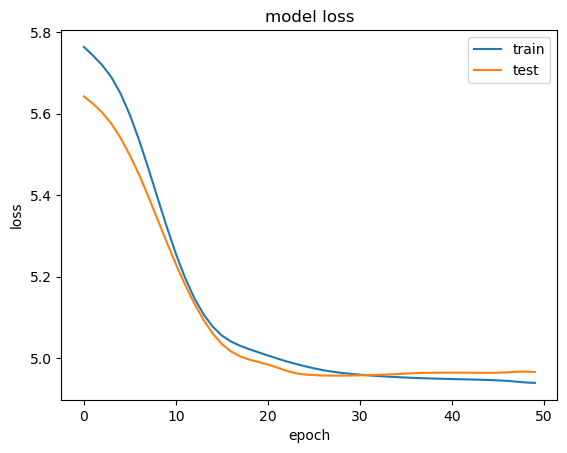

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [98]:
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
5760,9.725234,23.1430,4.7404,15.810555,3.976249,1.663395,-0.500336,2.2943,-4.2173,0.996787,...,0.157709,0.320379,0.59707,-0.029724,0.036117,0.190046,-0.248472,stepper,p1,1.0
5761,9.338502,21.5560,3.2083,13.511136,3.675750,1.501780,-0.417666,2.3492,-5.0213,1.113368,...,0.068890,0.305362,0.58717,-0.041444,0.033846,0.183973,-0.078934,stepper,p1,1.0
5762,9.758073,23.0280,4.5964,15.131609,3.889937,1.496554,-0.339354,2.6967,-3.4259,1.195119,...,-0.025852,0.271109,0.54881,-0.013597,0.031880,0.178551,0.046234,stepper,p1,1.0
5763,9.625570,22.3870,4.3394,15.898343,3.987273,1.620416,-0.310809,2.0502,-4.3835,1.190077,...,0.403472,0.299858,0.54294,-0.018200,0.031962,0.178781,-0.222449,stepper,p1,1.0
5764,9.479315,22.5660,4.6795,12.511807,3.537203,1.575279,-0.365894,1.6065,-4.5499,0.972988,...,0.209921,0.289785,0.55596,-0.024470,0.035503,0.188423,-0.064461,stepper,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.401254,-0.410987,-0.38221,-0.446050,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.147180,-0.411248,-0.36581,-0.436760,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.032341,-0.409787,-0.37926,-0.434310,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.409508,-0.409101,-0.36074,-0.440870,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [99]:
testdata = X_test['Class']
X_test = X_test.drop(['activity', 'people', 'Class'], axis=1)


In [100]:
predictions = autoencoder.predict(X_test)


45/45 [==============================] - 0s 2ms/step


2024-10-20 23:18:35.803470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [101]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
len(mse)

1440

In [102]:
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': testdata})
error_df.describe()

,reconstruction_error,true_class
count,1440.000000,1440.000000
mean,7.766403,0.333333
std,5.462112,0.471568
min,4.498531,0.000000
25%,4.704203,0.000000
50%,5.034735,0.000000
75%,8.991909,1.000000
max,46.133249,1.000000


In [107]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 6

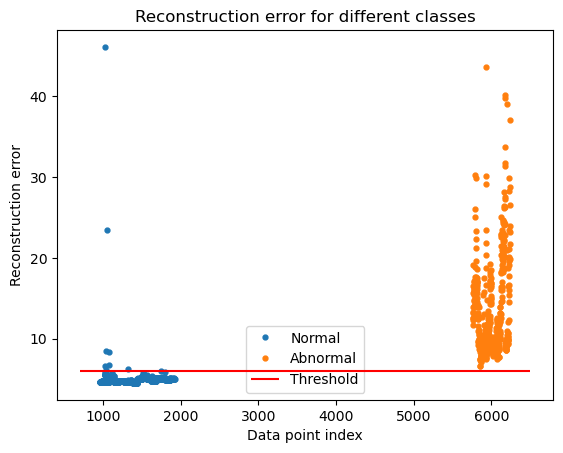

In [108]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

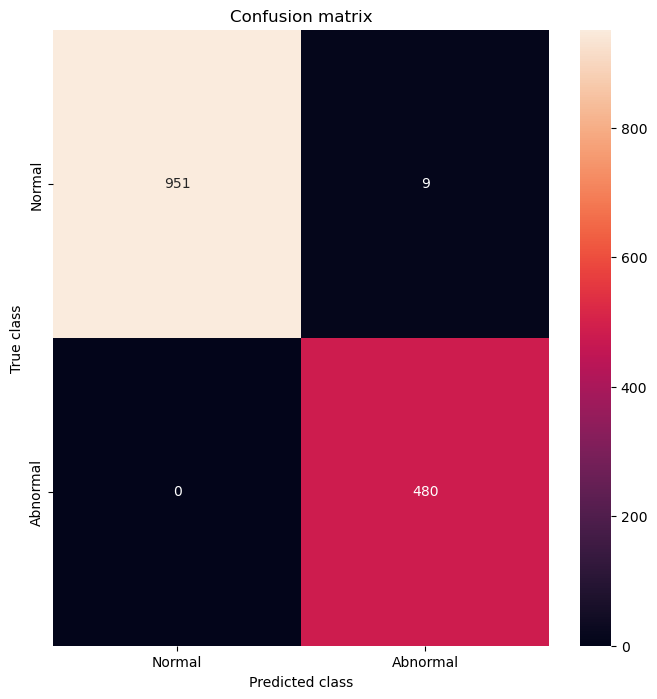

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       960
         1.0       0.98      1.00      0.99       480

    accuracy                           0.99      1440
   macro avg       0.99      1.00      0.99      1440
weighted avg       0.99      0.99      0.99      1440



In [109]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [119]:
df = pd.read_csv('./DSA_features.csv')

In [120]:
df.shape

(9120, 272)

In [121]:
LABELS = ["Normal", "Abnormal"]

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_56021/2417958649.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


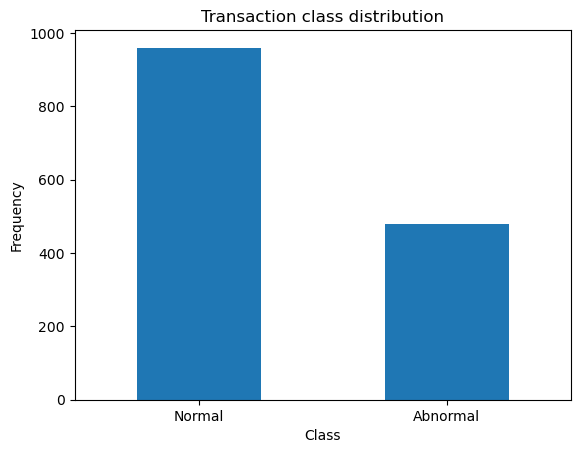

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# 'lyingBack'과 'lyingRigh'는 Normal(0)로, 'jumping'은 Abnormal(1)로 설정
df['Class'] = df['activity'].apply(lambda x: 0 if x in ['lyingBack', 'lyingRigh'] else (1 if x == 'stepper' else None))

# 결측값 제거 (필요에 따라 적용)
df = df.dropna(subset=['Class'])

# Class별 샘플 수 세기
count_classes = pd.value_counts(df['Class'], sort=True)

# 막대 그래프 그리기
LABELS = ['Normal', 'Abnormal']
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [123]:
df['Class'].value_counts()

Class
0.0    960
1.0    480
Name: count, dtype: int64

In [124]:
Abnormal = df[df.Class == 1]
normal = df[df.Class == 0]
Abnormal.shape

(480, 273)

In [125]:
X_train = normal
X_train = normal.drop(['Class', 'activity', 'people'], axis=1)


In [126]:
X_test = pd.concat([Abnormal, normal])
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
5760,9.725234,23.1430,4.7404,15.810555,3.976249,1.663395,-0.500336,2.2943,-4.2173,0.996787,...,0.157709,0.320379,0.59707,-0.029724,0.036117,0.190046,-0.248472,stepper,p1,1.0
5761,9.338502,21.5560,3.2083,13.511136,3.675750,1.501780,-0.417666,2.3492,-5.0213,1.113368,...,0.068890,0.305362,0.58717,-0.041444,0.033846,0.183973,-0.078934,stepper,p1,1.0
5762,9.758073,23.0280,4.5964,15.131609,3.889937,1.496554,-0.339354,2.6967,-3.4259,1.195119,...,-0.025852,0.271109,0.54881,-0.013597,0.031880,0.178551,0.046234,stepper,p1,1.0
5763,9.625570,22.3870,4.3394,15.898343,3.987273,1.620416,-0.310809,2.0502,-4.3835,1.190077,...,0.403472,0.299858,0.54294,-0.018200,0.031962,0.178781,-0.222449,stepper,p1,1.0
5764,9.479315,22.5660,4.6795,12.511807,3.537203,1.575279,-0.365894,1.6065,-4.5499,0.972988,...,0.209921,0.289785,0.55596,-0.024470,0.035503,0.188423,-0.064461,stepper,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.401254,-0.410987,-0.38221,-0.446050,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.147180,-0.411248,-0.36581,-0.436760,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.032341,-0.409787,-0.37926,-0.434310,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.409508,-0.409101,-0.36074,-0.440870,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [127]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 입력 데이터의 차원 수 정의 (예: X_train 데이터의 열 개수).
input_dim = X_train.shape[1]  # 입력 차원 크기

# 인코딩 차원 수 설정 (압축할 차원).
encoding_dim = 14  # 잠재 공간의 크기

# **입력 레이어 정의**.
input_layer = Input(shape=(input_dim,))

# **비대칭 인코딩 과정**: 
# 입력 데이터를 차례로 64, 32, 14차원으로 압축.
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # 최종 잠재 공간

# **비대칭 디코딩 과정**:
# 14차원 잠재 공간을 원래 입력 차원으로 복원. 
# 더 많은 레이어를 사용해 복원 과정이 복잡하도록 설계.
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)

decoded = Dense(256, activation='relu')(decoded)  # 추가 복원 레이어
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 최종 복원

# **Autoencoder 모델 생성** (입력과 출력 정의).
autoencoder = Model(inputs=input_layer, outputs=decoded)

# **모델 컴파일**: Adam 옵티마이저와 MSE 손실 함수 사용.
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# **모델 구조 출력**.
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_24 (Dense)            (None, 64)                17344     
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 14)                462       
                                                                 
 dense_27 (Dense)            (None, 32)                480       
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dense_29 (Dense)            (None, 128)               8320

In [128]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50


2024-10-21 01:42:37.845940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 99ms/step - loss: 5.7081 - val_loss: 5.5400
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 5.5178 - val_loss: 5.3205
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 5.2297 - val_loss: 5.1077
Epoch 4/50


2024-10-21 01:42:38.300868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 12ms/step - loss: 5.0561 - val_loss: 5.0145
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 4.9954 - val_loss: 4.9522
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9600 - val_loss: 4.9478
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 4.9433 - val_loss: 4.9546
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9363 - val_loss: 4.9635
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9335 - val_loss: 4.9524
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9299 - val_loss: 4.9389
Epoch 11/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9265 - val_loss: 4.9385
Epoch 12/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9217 - val_loss: 4.9241
Epoch 13/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9178 - val_loss: 4.9232
Epoch 14/50
4/4 [====================

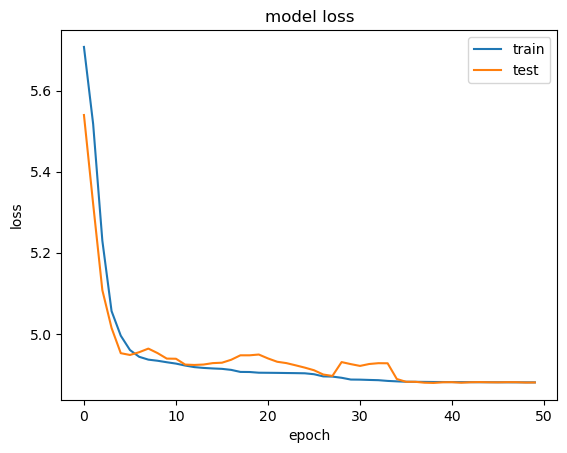

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [130]:
testdata = X_test['Class']
X_test = X_test.drop(['activity', 'people', 'Class'], axis=1)


In [131]:
predictions = autoencoder.predict(X_test)


45/45 [==============================] - 0s 2ms/step


2024-10-21 01:42:42.018891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [132]:
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': testdata})
error_df.describe()

,reconstruction_error,true_class
count,1440.000000,1440.000000
mean,7.766403,0.333333
std,5.462112,0.471568
min,4.498531,0.000000
25%,4.704203,0.000000
50%,5.034735,0.000000
75%,8.991909,1.000000
max,46.133249,1.000000


In [139]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 6

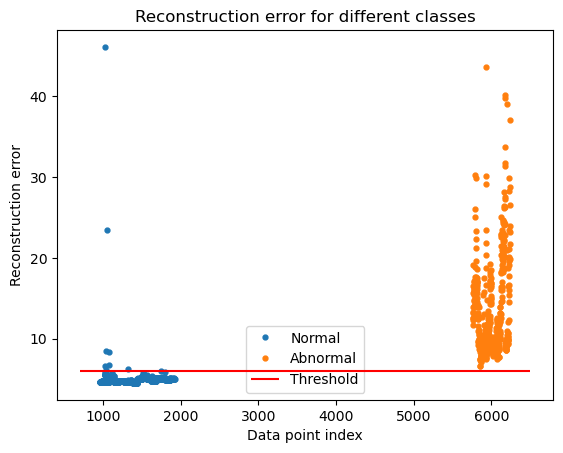

In [140]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

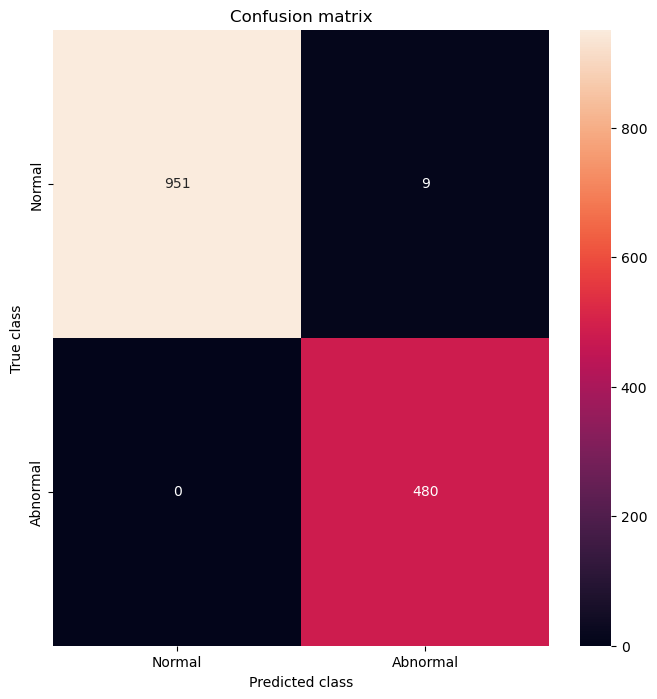

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       960
         1.0       0.98      1.00      0.99       480

    accuracy                           0.99      1440
   macro avg       0.99      1.00      0.99      1440
weighted avg       0.99      0.99      0.99      1440



In [141]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))